# Matplotlib

      StudentID  Age  Total_Marks  Attendance       City Gender
0          1001   16          301          67      Delhi      M
1          1002   17          211          79  Bangalore      M
2          1003   15          474          92    Chennai      F
3          1004   17          300          85  Bangalore      F
4          1005   17          243          98    Chennai      F
...         ...  ...          ...         ...        ...    ...
1495       2496   17          436          61     Mumbai      M
1496       2497   16          376          96    Kolkata      M
1497       2498   16          340          97      Delhi      F
1498       2499   15          388          61     Mumbai      M
1499       2500   18          248          95      Delhi      M

[1500 rows x 6 columns]


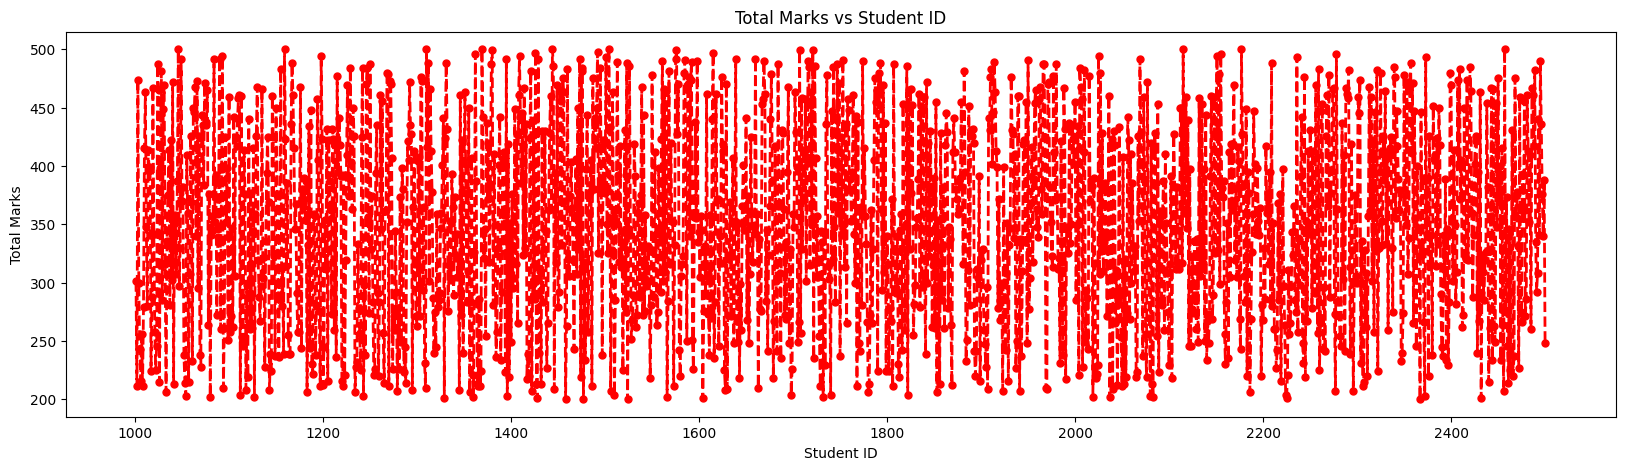

In [34]:
#1. Create a line chart of Total_Marks against StudentID, with labeled axes and a title.
# Customize colors, line styles, and markers.
import pandas as pd
import matplotlib.pyplot as plot

student = pd.read_excel("C:\\Users\\XNovaQ.23\\Downloads\\student_performance.xlsx")
# print(student)
plt.figure(figsize=(20,5))

plt.plot(
    student['StudentID'],
    student['Total_Marks'],
    color='red',
    linestyle='--',
    marker='o',
    markersize=5,
    linewidth=2
)

plt.title("Total Marks vs Student ID")
plt.xlabel("Student ID")
plt.ylabel("Total Marks")

plt.show()



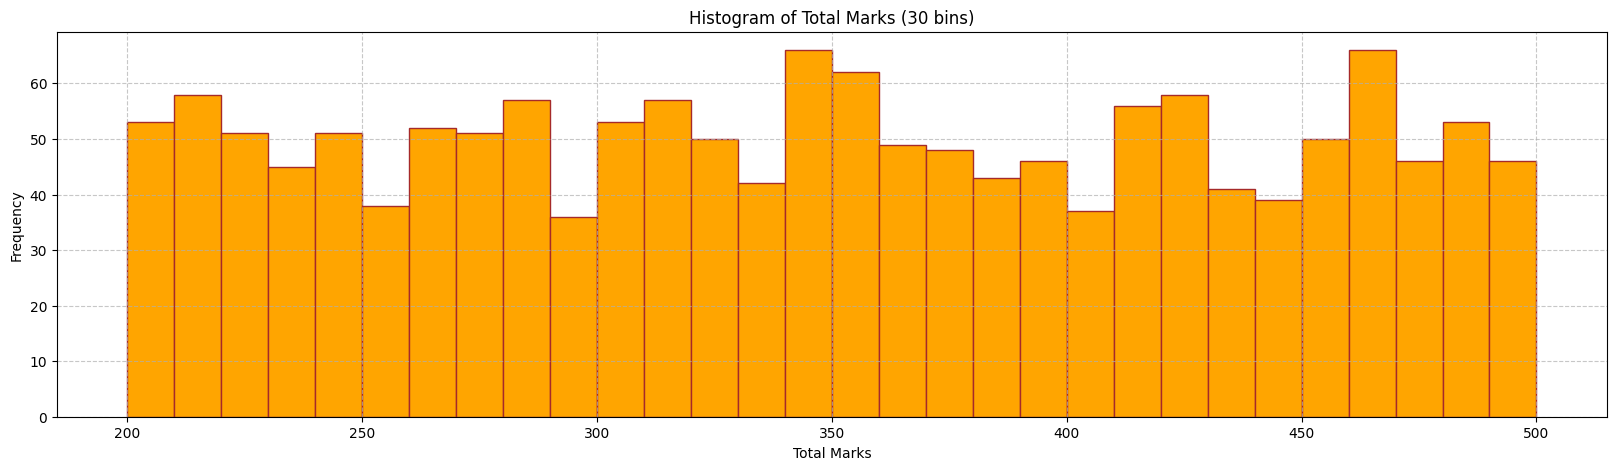

In [21]:
#2. Plot a histogram of Total_Marks using 30 bins; add grid lines and use a customized color
# palette.

plt.figure(figsize=(20,5))

plt.hist(
    student['Total_Marks'], 
    bins=30,                    
    color='orange',             
    edgecolor='brown'            
)

plt.title("Histogram of Total Marks (30 bins)")
plt.xlabel("Total Marks")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)   

plt.show()

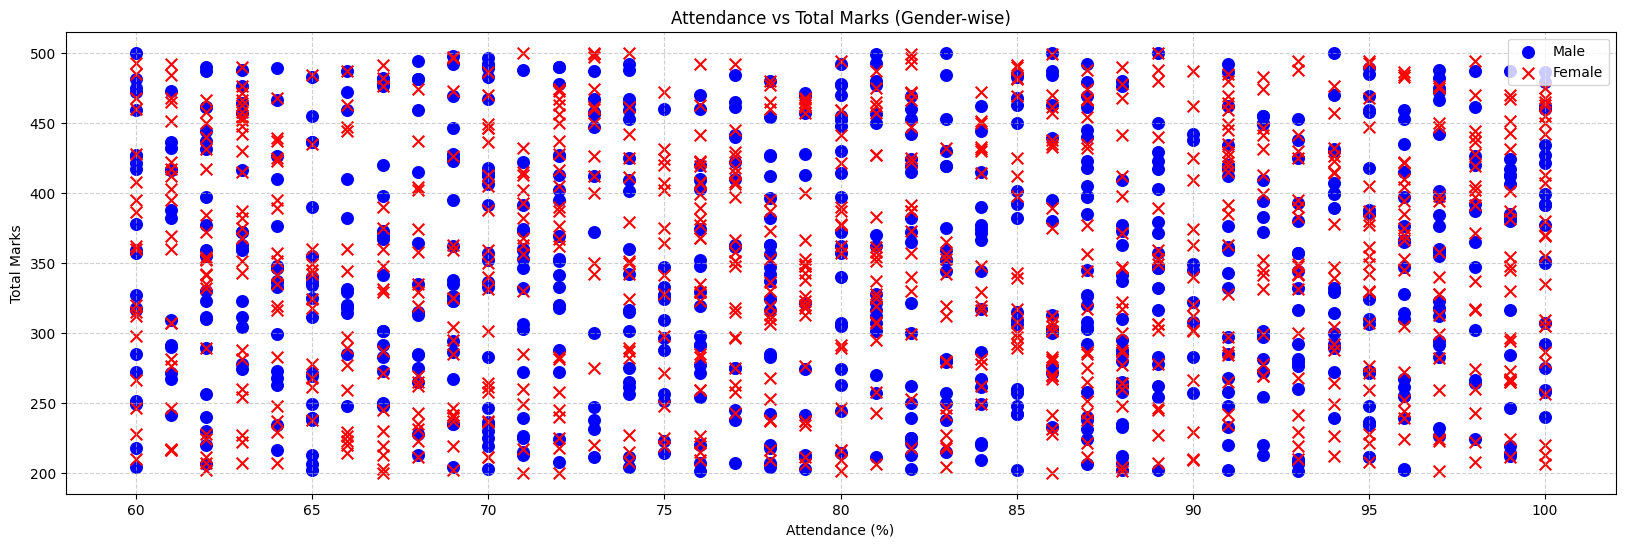

In [36]:
#3. Generate a scatter plot of Attendance vs Total_Marks, using different markers and colors
# for Gender.
plt.figure(figsize=(20,6))


male_data = student[student['Gender'] == 'M']
plt.scatter(
    male_data['Attendance'],
    male_data['Total_Marks'],
    color='blue',
    marker='o',
    label='Male',
    s=70               
)

female_data = student[student['Gender'] == 'F']
plt.scatter(
    female_data['Attendance'],
    female_data['Total_Marks'],
    color='red',
    marker='x',          
    label='Female',
    s=70
)

plt.title("Attendance vs Total Marks (Gender-wise)")
plt.xlabel("Attendance (%)")
plt.ylabel("Total Marks")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

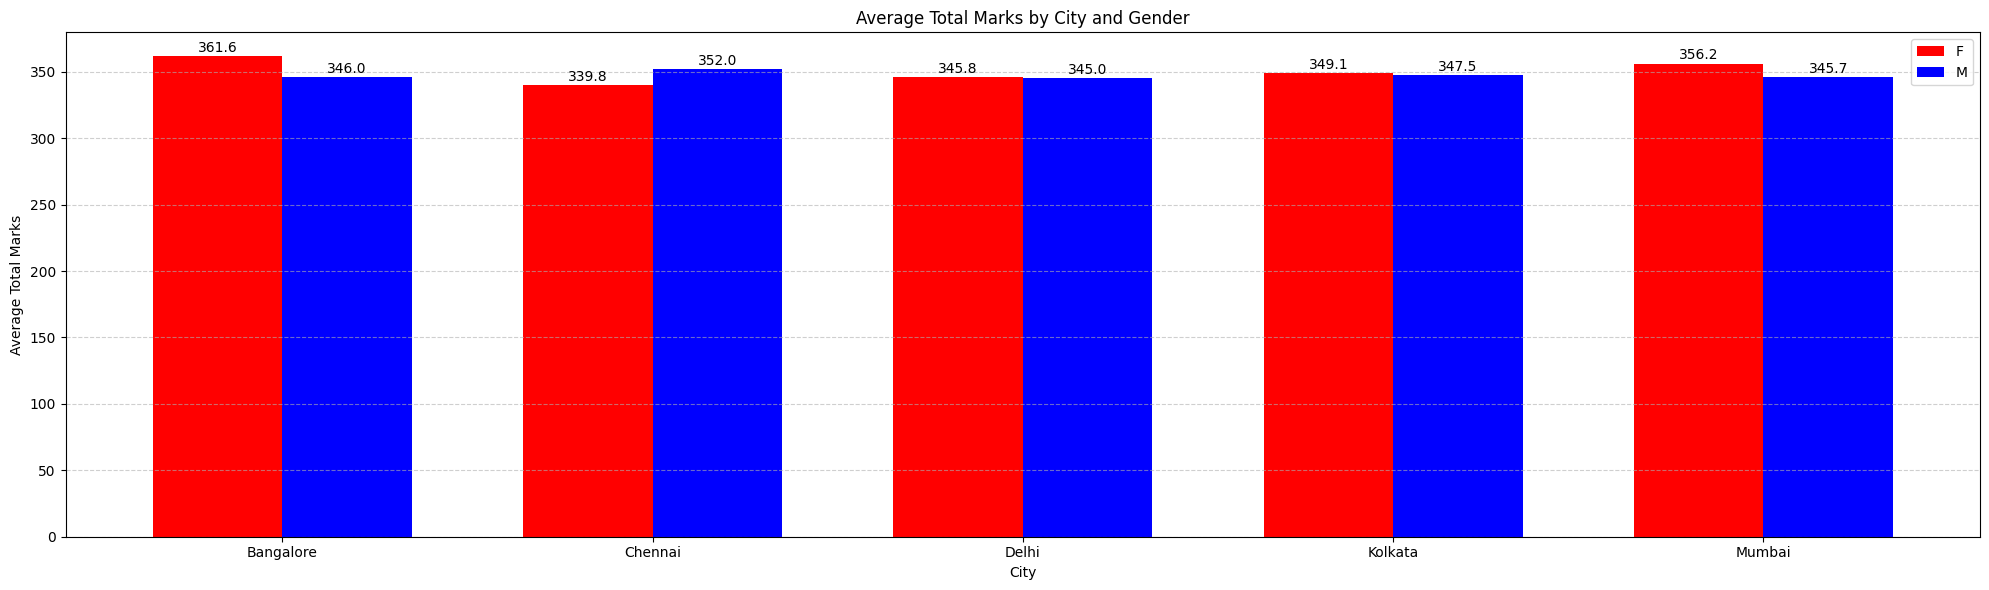

In [44]:
# 4. Create a grouped bar chart showing average Total_Marks by City and Gender. Annotate
# bars and add a legend.
import numpy as np


grouped = student.groupby(['City', 'Gender'])['Total_Marks'].mean().unstack()


cities = grouped.index
genders = grouped.columns
x = np.arange(len(cities))        
width = 0.35                      

plt.figure(figsize=(20,6))

colors = ['red','blue']

# bars 
for i, gender in enumerate(genders):
    plt.bar(
        x + i * width,                 
        grouped[gender],                
        width,
        color=colors[i],
        label=gender
    )
plt.title("Average Total Marks by City and Gender")
plt.xlabel("City")
plt.ylabel("Average Total Marks")
plt.xticks(x + width / 2, cities)      
plt.legend()


for i, gender in enumerate(genders):
    for j, val in enumerate(grouped[gender]):
        plt.text(
            x[j] + i * width, val + 1,    
            f"{val:.1f}",                   
            ha='center', va='bottom'
        )

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\XNovaQ.23\AppData\Local\Temp\ipykernel_8664\1724390321.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


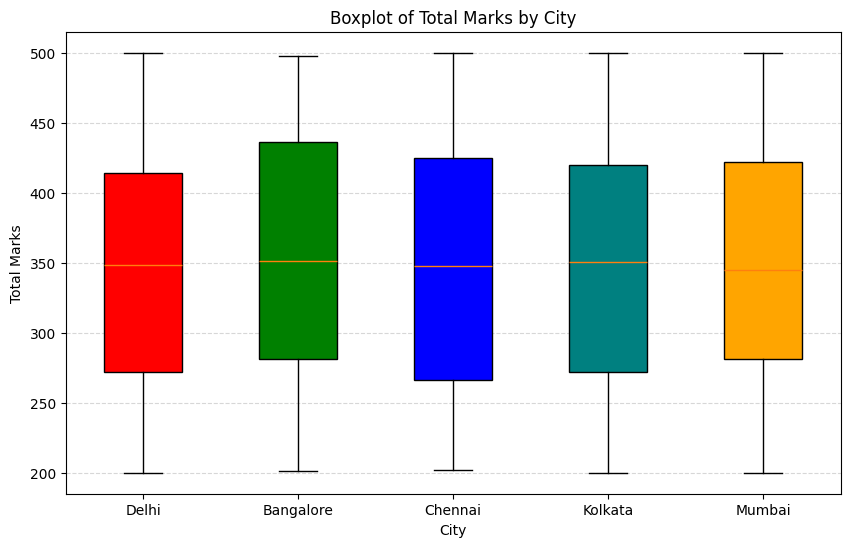

In [46]:
# 5. Plot boxplots of Total_Marks categorized by City. Use different colors for each boxplot.
cities = student['City'].unique()
data = [student[student['City'] == city]['Total_Marks'] for city in cities]

plt.figure(figsize=(10,6))

colors = ['red', 'green', 'blue', 'teal', 'orange', 'gold']

box = plt.boxplot(
    data,
    patch_artist=True, 
    labels=cities
)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Boxplot of Total Marks by City")
plt.xlabel("City")
plt.ylabel("Total Marks")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



C:\Users\XNovaQ.23\AppData\Local\Temp\ipykernel_8664\4098245410.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axis[2].boxplot(


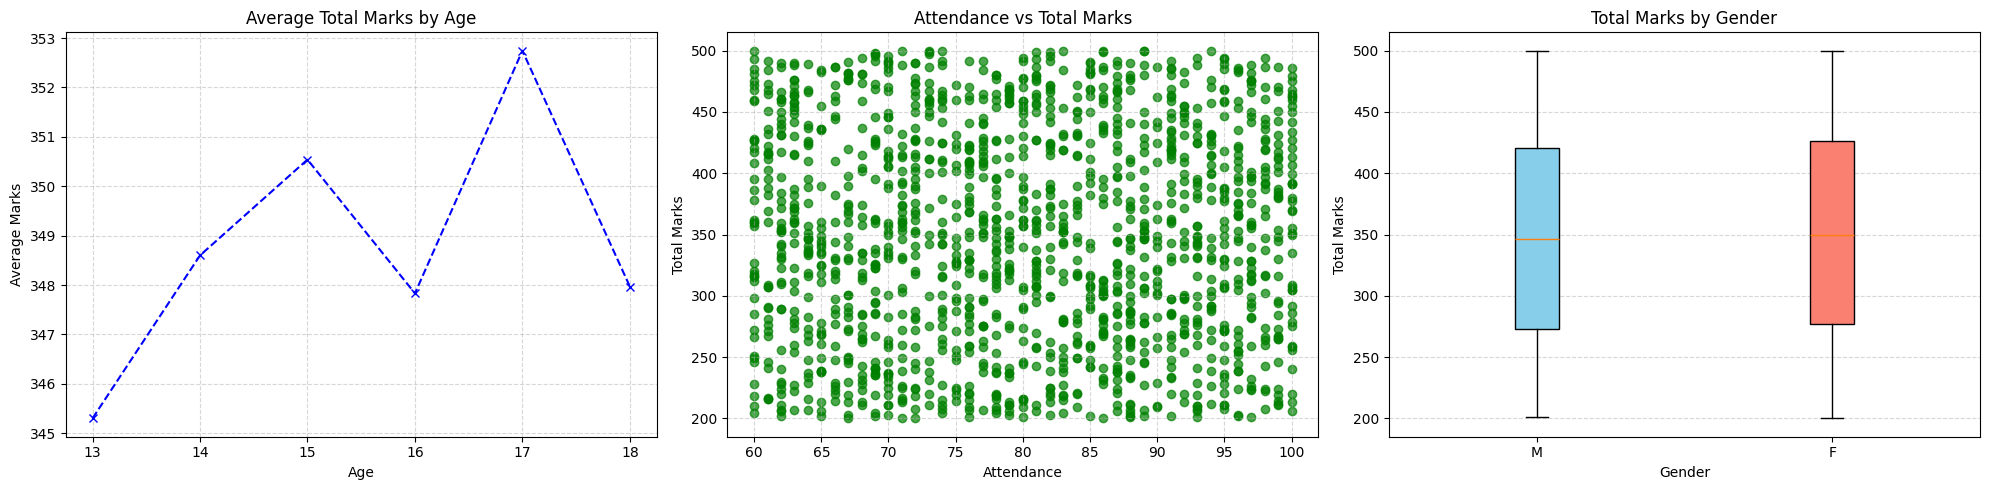

In [50]:
# 6. Create a multi-plot figure with subplots: a line plot showing average Total_Marks by Age, a
# scatter plot of Attendance vs Total_Marks, and a boxplot by Gender.

# line plot
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
avg_age = student.groupby("Age")["Total_Marks"].mean()
axis[0].plot(
    avg_age.index,
    avg_age.values,
    marker='x',
    linestyle='--',
    color='blue'
)
axis[0].set_title("Average Total Marks by Age")
axis[0].set_xlabel("Age")
axis[0].set_ylabel("Average Marks")
axis[0].grid(True, linestyle='--', alpha=0.5)

# Scatter Plot

axis[1].scatter(
    student["Attendance"],
    student["Total_Marks"],
    color='green',
    alpha=0.7
)
axis[1].set_title("Attendance vs Total Marks")
axis[1].set_xlabel("Attendance")
axis[1].set_ylabel("Total Marks")
axis[1].grid(True, linestyle='--', alpha=0.5)

# 3. Boxplot

genders = student['Gender'].unique()
data = [student[student['Gender'] == g]['Total_Marks'] for g in genders]

colors = ['skyblue', 'salmon']  

box = axis[2].boxplot(
    data,
    labels=genders,
    patch_artist=True
)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

axis[2].set_title("Total Marks by Gender")
axis[2].set_xlabel("Gender")
axis[2].set_ylabel("Total Marks")
axis[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


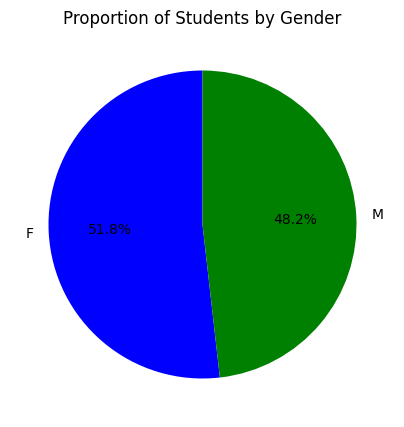

In [55]:
#7. Plot a pie chart illustrating the proportion of students by Gender.
gender_count = student['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    gender_count,
    labels=gender_count.index,
    colors = ['blue','green'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Proportion of Students by Gender")
plt.show()



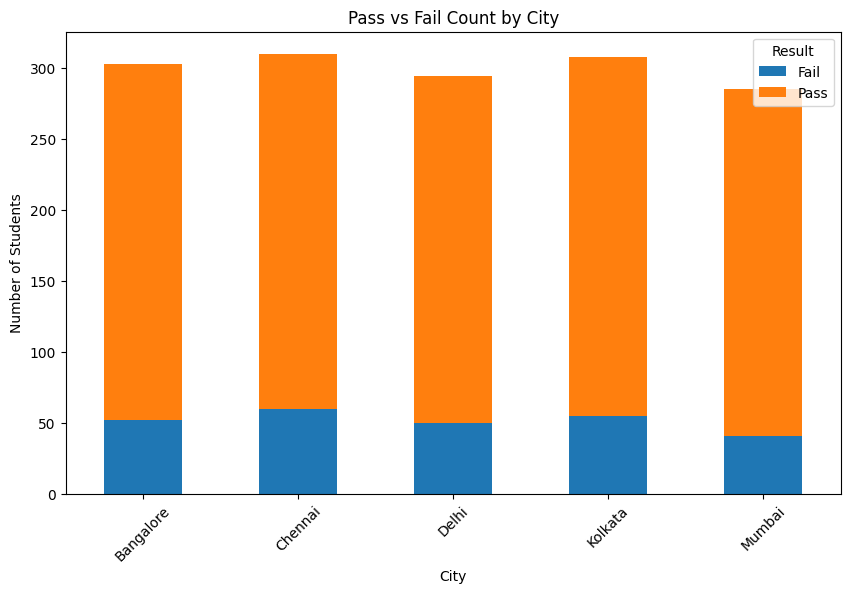

In [56]:
#8. Draw a stacked bar chart representing the count of passing (≥250 marks) and failing students for each City.
import numpy as np

student['Result'] = student['Total_Marks'].apply(lambda x: 'Pass' if x >= 250 else 'Fail')
city_group = student.groupby(['City', 'Result']).size().unstack(fill_value=0)
city_group.plot(kind='bar',
                stacked=True,
                figsize=(10,6))

plt.title("Pass vs Fail Count by City")
plt.xlabel("City")
plt.ylabel("Number of Students")
plt.legend(title="Result")
plt.xticks(rotation=45)
plt.show()


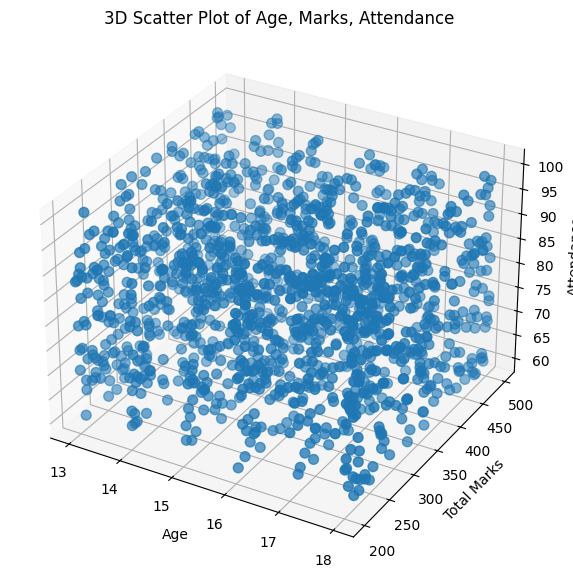

In [59]:
#9. Create a 3D scatter plot visualizing Age, Total_Marks, and Attendance.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    student['Age'],
    student['Total_Marks'],
    student['Attendance'],
    s=50
)

ax.set_xlabel('Age')
ax.set_ylabel('Total Marks')
ax.set_zlabel('Attendance')
plt.title("3D Scatter Plot of Age, Marks, Attendance")
plt.show()


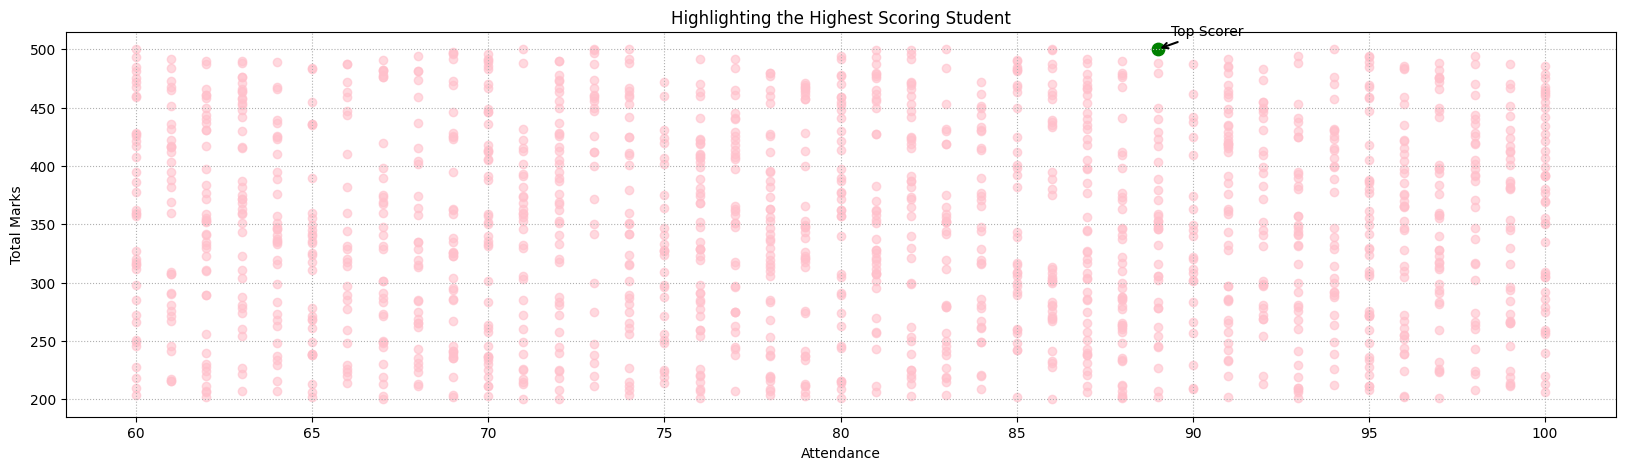

In [68]:
# 10, Use annotations to highlight the student with the highest marks on a scatter plot.
top = student.loc[student["Total_Marks"].idxmax()]

plt.figure(figsize=(20,5))
plt.scatter(student["Attendance"],
            student["Total_Marks"],
            color="pink",
            alpha=0.6)
plt.scatter(top["Attendance"],
            top["Total_Marks"],
            color="green", s=80)

plt.annotate("Top Scorer", 
             (top["Attendance"],
              top["Total_Marks"]),
             textcoords="offset points",
             xytext=(10,10),
             arrowprops=dict(arrowstyle="->",lw=1.5))

plt.xlabel("Attendance")
plt.ylabel("Total Marks")
plt.title("Highlighting the Highest Scoring Student")
plt.grid(True, linestyle=':')
plt.show()



# Sea born

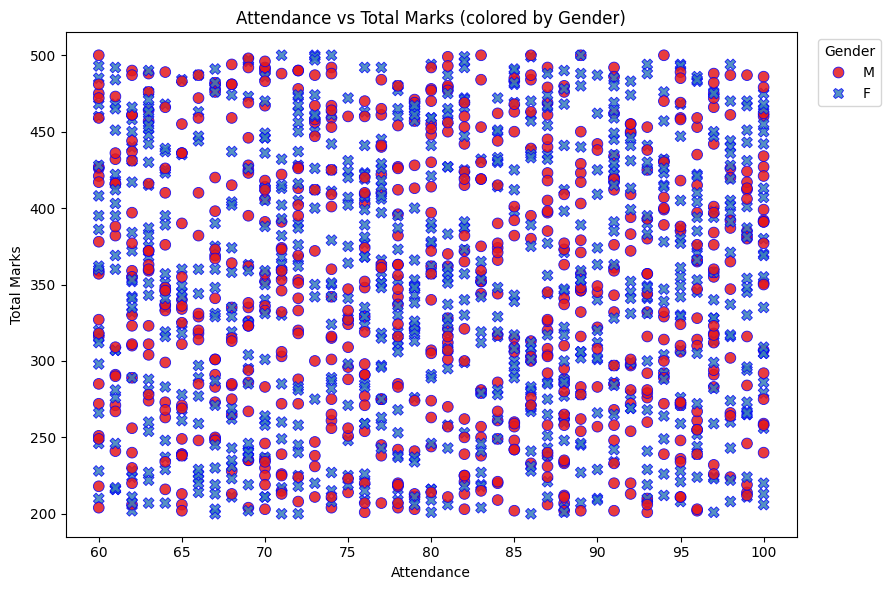

In [85]:
 # 1.Create a scatter plot of Attendance vs Total_Marks, with points colored by Gender.
import seaborn as sns
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=student,
    x="Attendance",
    y="Total_Marks",
    hue="Gender",
    style="Gender",            
    palette="Set1",
    s=60,
    edgecolor="b",
    alpha=0.85
)
plt.title("Attendance vs Total Marks (colored by Gender)")
plt.xlabel("Attendance")
plt.ylabel("Total Marks")
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.23\AppData\Local\Temp\ipykernel_8664\872366744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


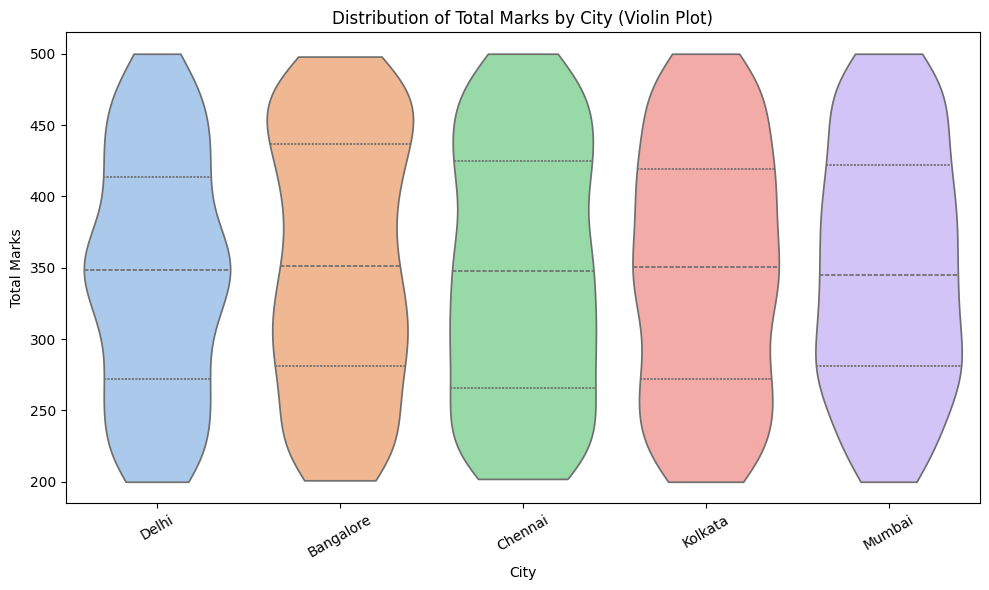

In [88]:
# 2. Plot violin plots to visualize the distribution of Total_Marks across different City categories.
plt.figure(figsize=(10,6))
order = student['City'].cat.categories if hasattr(student['City'], 'cat') else student['City'].unique()
sns.violinplot(
    data=student,
    x="City",
    y="Total_Marks",
    order=order,
    inner="quartile",
    palette="pastel",
    cut=0
)
plt.title("Distribution of Total Marks by City (Violin Plot)")
plt.xlabel("City")
plt.ylabel("Total Marks")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

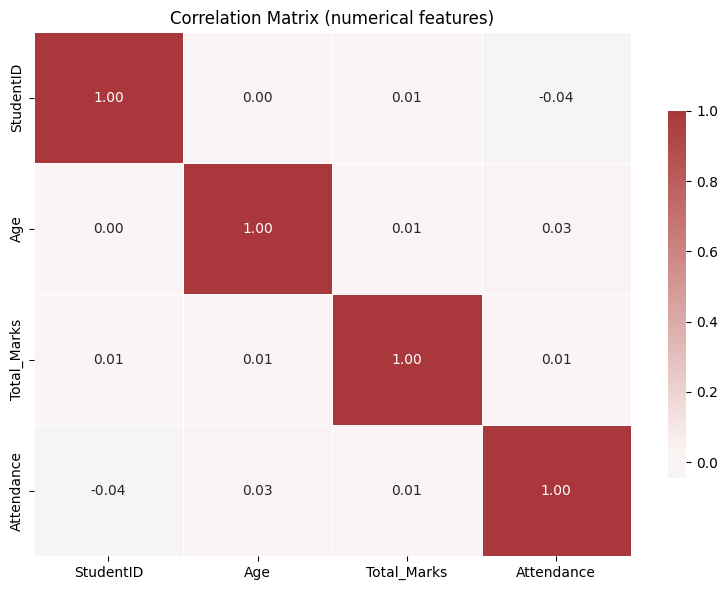

In [90]:
# 3. Generate a heatmap of the correlation matrix of all numerical features, including
# annotations and an appropriate color palette.
numeric = student.select_dtypes(include=[np.number]).copy()
corr = numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink":0.7}
)
plt.title("Correlation Matrix (numerical features)")
plt.tight_layout()
plt.show()

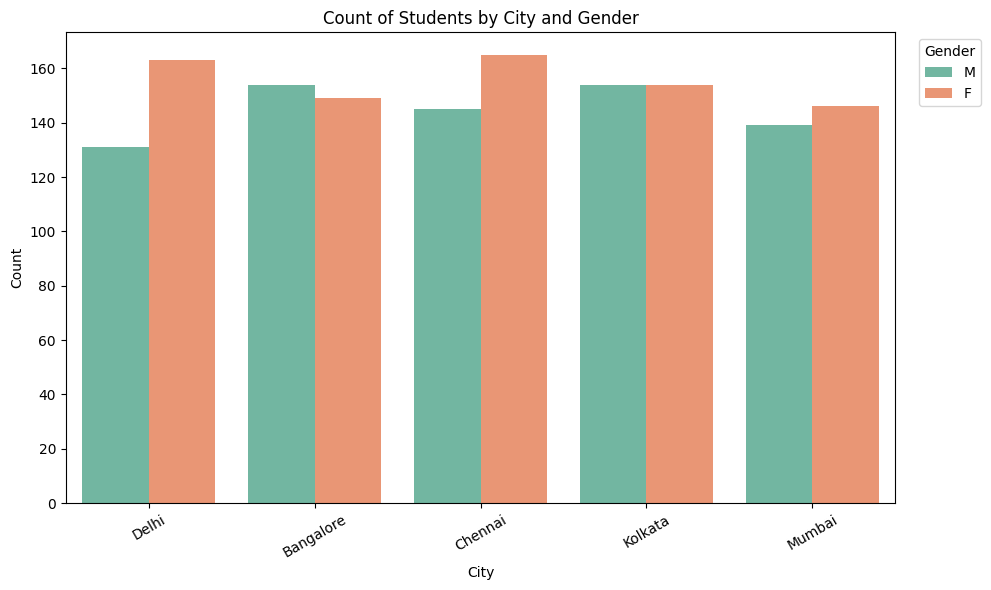

In [91]:
# 4.Draw a countplot to show the number of students in each City, distinguished by Gender
# using hue.

plt.figure(figsize=(10,6))
sns.countplot(
    data=student,
    x="City",
    hue="Gender",
    order=order,
    palette="Set2"
)
plt.title("Count of Students by City and Gender")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.23\Documents\Git JN\Sivabalan_Xnovaq\pyenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.23\Documents\Git JN\Sivabalan_Xnovaq\pyenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.23\Documents\Git JN\Sivabalan_Xnovaq\pyenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.23\Documents\Git JN\Sivabalan_Xnovaq\pyenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade`

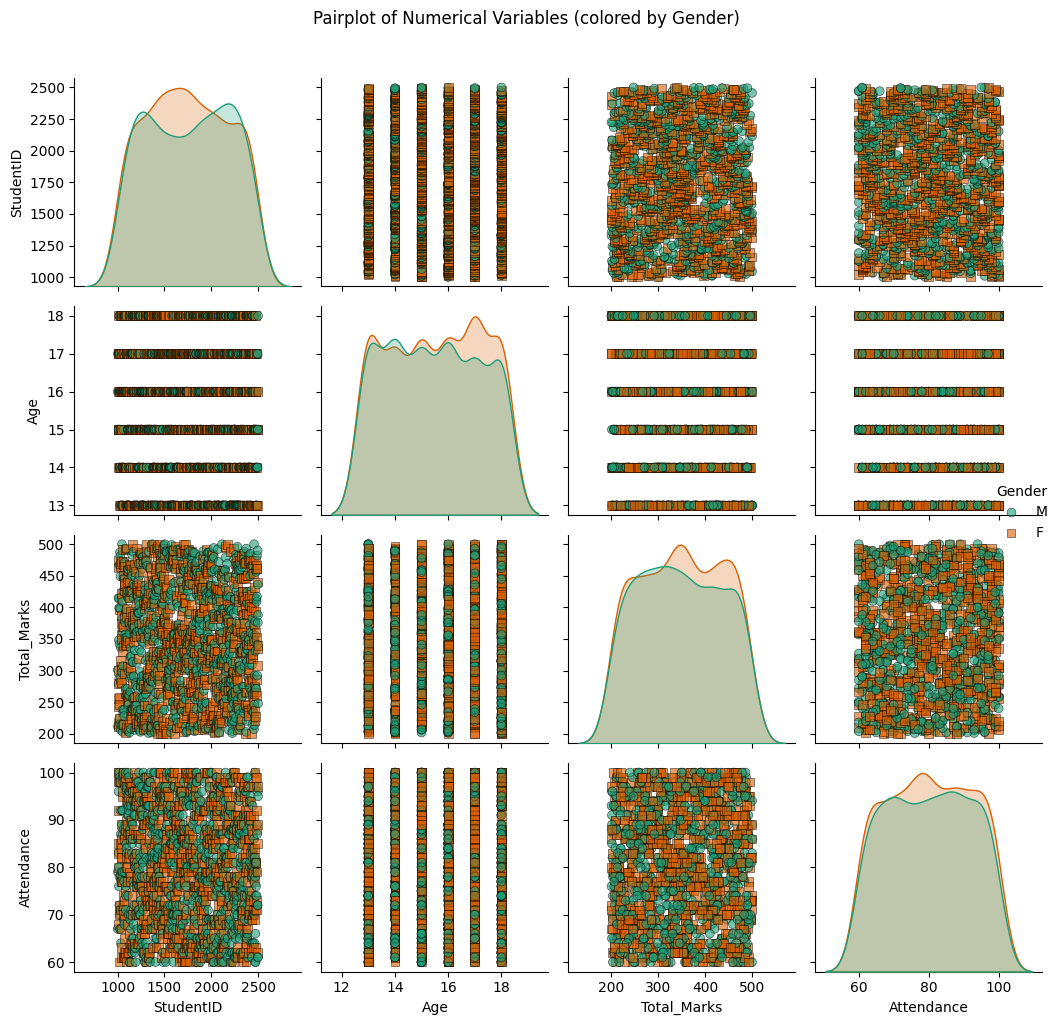

In [93]:
# 5.Use a pairplot with hue and custom markers to explore relationships between numerical
# variables colored by Gender.

numeric_cols = numeric.columns.tolist()
if len(numeric_cols) > 4:
    keep = [c for c in ["Total_Marks", "Attendance", "Age"] if c in numeric_cols]
    other = [c for c in numeric_cols if c not in keep]
    
    if other:
        keep.append(other[0])
    pair_cols = keep
else:
    pair_cols = numeric_cols

genders = student["Gender"].cat.categories if hasattr(student["Gender"], 'cat') else student["Gender"].unique()
base_markers = ['o', 's', '^', 'D', 'P', 'X', '*']
markers = base_markers[:len(genders)]

sns.pairplot(
    student,
    vars=pair_cols,
    hue="Gender",
    markers=markers,
    palette="Dark2",
    corner=False,
    diag_kind="kde",
    plot_kws={'alpha':0.6, 'edgecolor':'k', 's':40},
    diag_kws={'shade':True}
)
plt.suptitle("Pairplot of Numerical Variables (colored by Gender)", y=1.02)
plt.tight_layout()
plt.show()

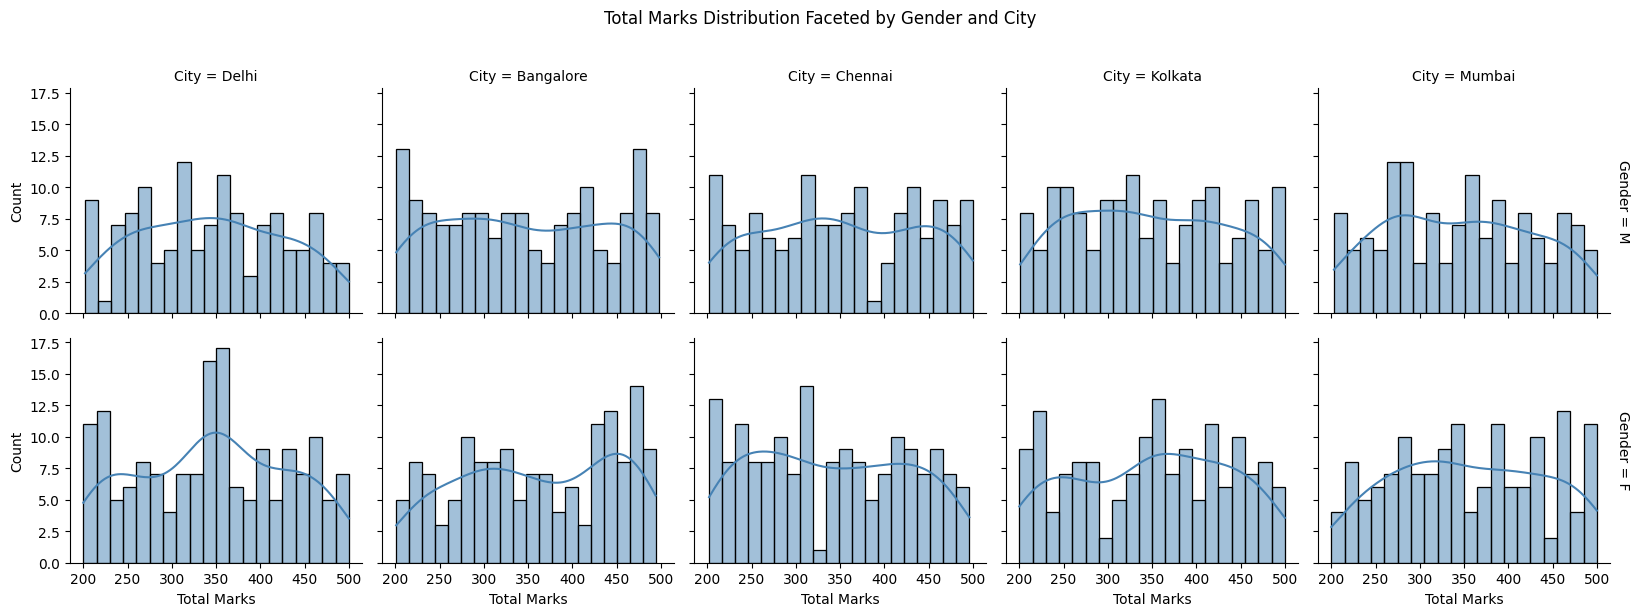

In [95]:
# 6.Create a FacetGrid displaying Total_Marks distributions faceted by Gender and City.

g = sns.FacetGrid(student, row="Gender", col="City", margin_titles=True, height=3, aspect=1.1)
g.map(sns.histplot, "Total_Marks", kde=True, bins=20, color="steelblue")
g.set_axis_labels("Total Marks", "Count")
g.fig.suptitle("Total Marks Distribution Faceted by Gender and City", y=1.02)
plt.tight_layout()
plt.show()

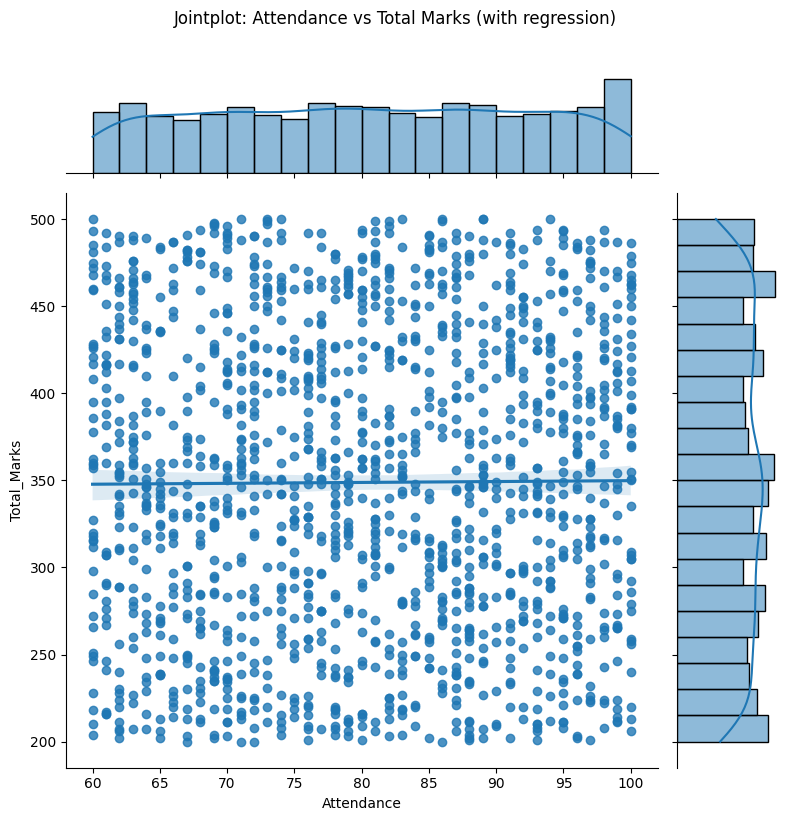

In [96]:
# 7.Plot a jointplot with regression line showing relationship between Attendance and
# Total_Marks.

jp = sns.jointplot(
    data=student,
    x="Attendance",
    y="Total_Marks",
    kind="reg",
    height=8,
    marginal_kws=dict(bins=20, fill=True)
)
jp.fig.suptitle("Jointplot: Attendance vs Total Marks (with regression)", y=1.02)
plt.tight_layout()
plt.show()

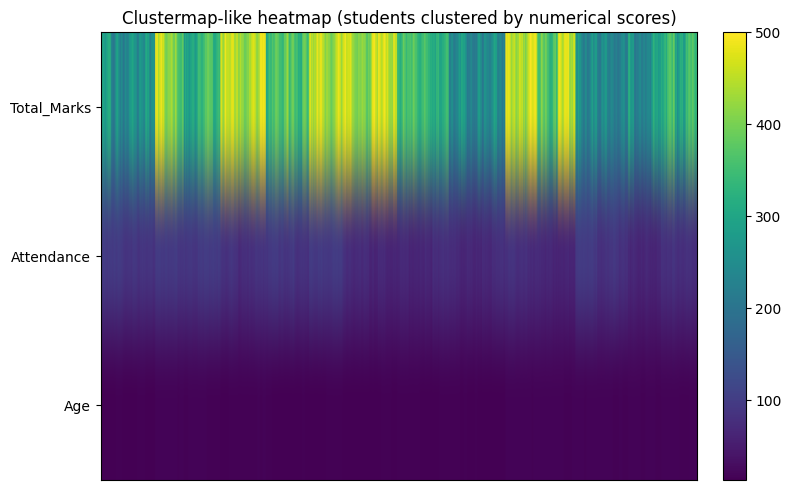

In [80]:
# 8.Generate a clustermap for hierarchical clustering based on numerical scores.
from scipy.cluster.hierarchy import linkage, leaves_list

data_for_cluster = student[['Total_Marks', 'Attendance', 'Age']].copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_for_cluster)
link = linkage(scaled, method='ward')
order = leaves_list(link)
ordered = data_for_cluster.iloc[order]
fig, ax = plt.subplots(figsize=(8,5))
cax = ax.imshow(ordered.T, aspect='auto', cmap='viridis')
ax.set_yticks(range(ordered.shape[1]))
ax.set_yticklabels(ordered.columns)
ax.set_xticks([])
ax.set_title('Clustermap-like heatmap (students clustered by numerical scores)')
fig.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.23\AppData\Local\Temp\ipykernel_8664\2772114608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


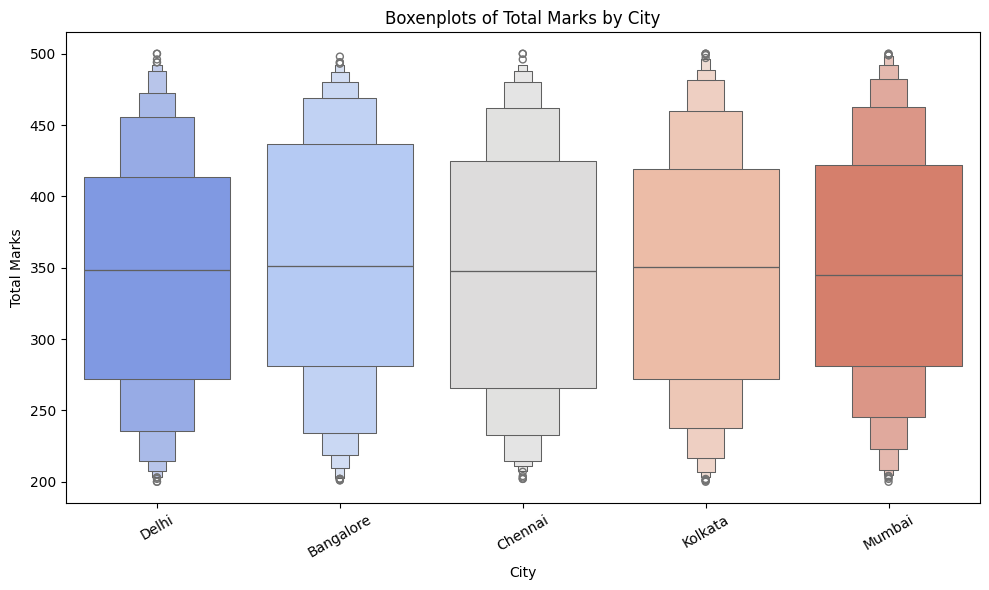

In [97]:
# 9. Create boxenplots for Total_Marks grouped by City.

plt.figure(figsize=(10,6))
sns.boxenplot(
    data=student,
    x="City",
    y="Total_Marks",
    order=order,
    palette="coolwarm"
)
plt.title("Boxenplots of Total Marks by City")
plt.xlabel("City")
plt.ylabel("Total Marks")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

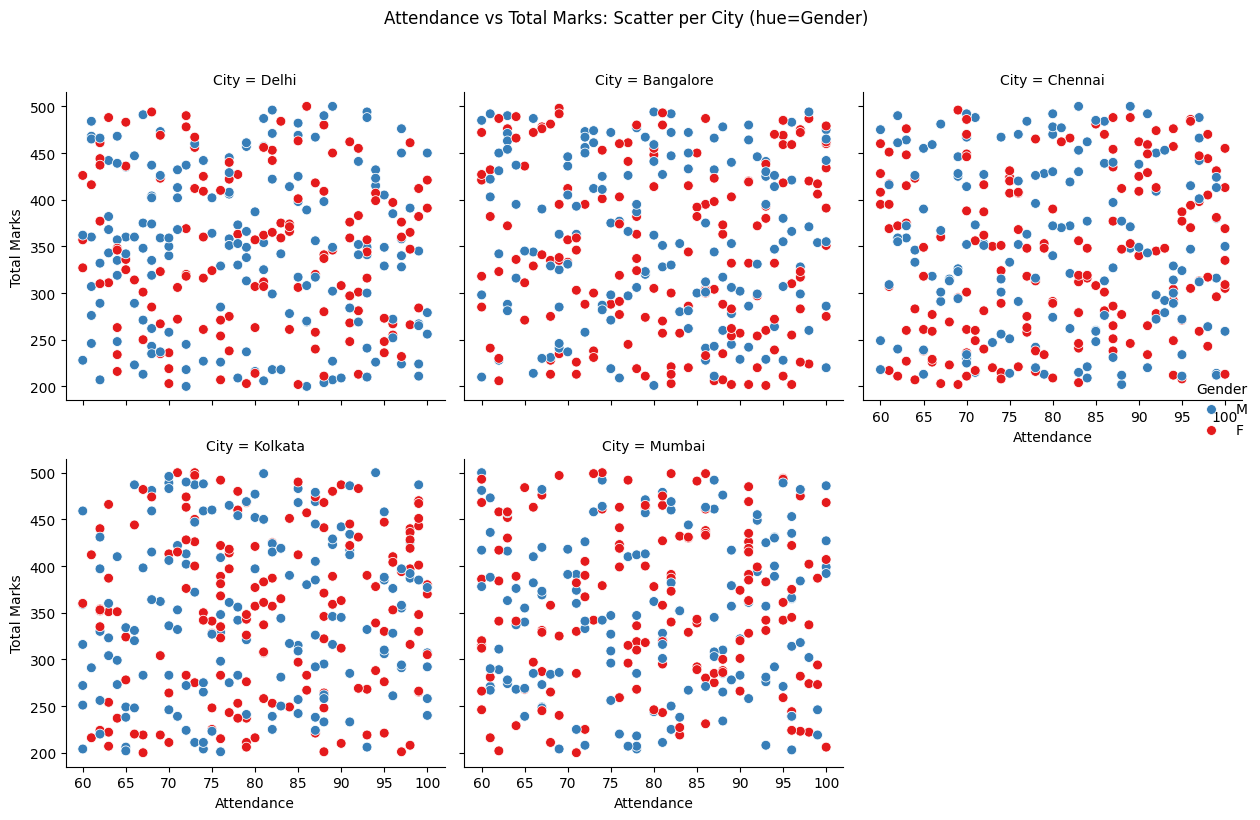

In [100]:
# 10) Use FacetGrid’s map_dataframe to plot scatterplots with distinct colors for Gender across
# City.
cities = student['City'].cat.categories if hasattr(student['City'], 'cat') else student['City'].unique()
g = sns.FacetGrid(student, col="City", col_wrap=3, height=4, sharex=True, sharey=True)
def draw_scatter(data, color, **kws):
    sns.scatterplot(
        data=data,
        x="Attendance",
        y="Total_Marks",
        hue="Gender",
        palette="Set1",
        s=50,
        edgecolor="w",
        **kws
    )
g.map_dataframe(draw_scatter)
g.set_axis_labels("Attendance", "Total Marks")
g.add_legend(title="Gender", adjust_subtitles=True)
g.fig.suptitle("Attendance vs Total Marks: Scatter per City (hue=Gender)", y=1.02)
plt.tight_layout()
plt.show()